# Generación de trayectorias

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/10-Generacion-Trayectorias/10-1-Generacion-Trayectorias.ipynb)


* Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC
* Fundamentos de Robótica

Este archivo contiene algunos ejemplos de generación cinemática de trayectorias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Ejemplo de Polinomio Cúbico (slide 23)

In [2]:
A = np.array([[2**3, 2**2, 2, 1],
              [4**3, 4**2, 4, 1],
              [3*2**2, 2*2, 1, 0],
              [3*4**2, 2*4, 1, 0]])
b = np.array([10, 60, 0, 0]).T

x = np.linalg.inv(A).dot(b)
a3=x[0]; a2=x[1]; a1=x[2]; a0=x[3]

print(x)

[ -12.5  112.5 -300.   260. ]


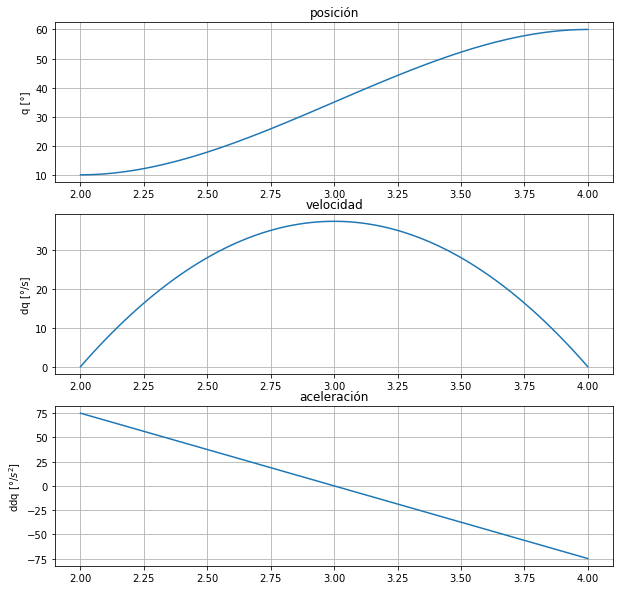

In [3]:
t = np.linspace(2, 4, 100)
# Posición
q = a3*t**3 + a2*t**2 + a1*t + a0
# Velocidad
dq = 3*a3*t**2 + 2*a2*t + a1
# Aceleración
ddq = 6*a3*t + 2*a2

plt.figure(figsize=(10,10))
plt.subplot(3,1,1); plt.plot(t,q); plt.grid(); plt.title('posición'); plt.ylabel("q [°]")
plt.subplot(3,1,2); plt.plot(t,dq); plt.grid(); plt.title('velocidad'); plt.ylabel("dq [°/s]")
plt.subplot(3,1,3); plt.plot(t,ddq); plt.grid(); plt.title('aceleración'); plt.ylabel("ddq [°/$s^2$]");

### 2. Ejemplo de Polinomio Quíntico (slide 25)

In [4]:
A = np.array([[2**5, 2**4, 2**3, 2**2, 2, 1],
              [4**5, 4**4, 4**3, 4**2, 4, 1],
              [5*2**4, 4*2**3, 3*2**2, 2*2, 1, 0],
              [5*4**4, 4*4**3, 3*4**2, 2*4, 1, 0],
              [20*2**3, 12*2**2, 6*2, 2, 0, 0],
              [20*4**3, 12*4**2, 6*4, 2, 0, 0]])
b = np.array([10, 60, 0, 0, 0, 0]).T

x = np.linalg.inv(A).dot(b)
a5=x[0]; a4=x[1]; a3=x[2]; a2=x[3]; a1=x[4]; a0=x[5]

print(x)

[    9.375  -140.625   812.5   -2250.     3000.    -1540.   ]


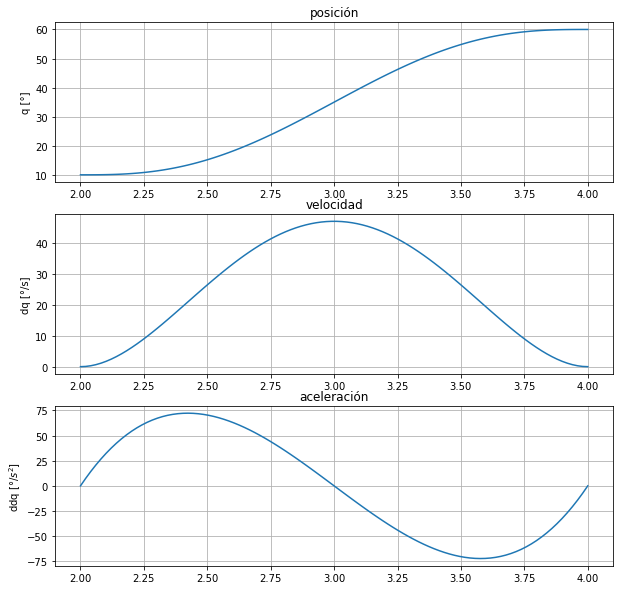

In [5]:
t = np.linspace(2, 4, 100)
# Posición
q = a5*t**5 + a4*t**4 + a3*t**3 + a2*t**2 + a1*t + a0
# Velocidad
dq = 5*a5*t**4 + 4*a4*t**3 + 3*a3*t**2 + 2*a2*t + a1
# Aceleración
ddq = 20*a5*t**3 + 12*a4*t**2 + 6*a3*t + 2*a2

plt.figure(figsize=(10,10))
plt.subplot(3,1,1); plt.plot(t,q); plt.grid(); plt.title('posición'); plt.ylabel("q [°]")
plt.subplot(3,1,2); plt.plot(t,dq); plt.grid(); plt.title('velocidad'); plt.ylabel("dq [°/s]")
plt.subplot(3,1,3); plt.plot(t,ddq); plt.grid(); plt.title('aceleración'); plt.ylabel("ddq [°/$s^2$]");

### 3. Interpolador de Velocidad Trapezoidal (slide 28)

In [6]:
def vel_trapezoidal(q0, qf, dqmax, tf, tb, tt):
    q = np.zeros(tt.shape)
    dq = np.zeros(tt.shape)
    ddq = np.zeros(tt.shape)
    for i in range(len(tt)):
        t = tt[i]
        if(t <= tb):
            q[i] = q0 + 1./2.*dqmax/tb*t**2
            dq[i] = dqmax/tb*t
            ddq[i] = dqmax/tb
        elif(t <= tf-tb):
            q[i] = q0 - 1./2.*tb*dqmax+dqmax*t
            dq[i] = dqmax
            ddq[i] = 0.0
        else:
            q[i] = qf - 1./2.*dqmax*(t-tf)**2/tb
            dq[i] = -dqmax/tb*(t-tf)
            ddq[i] = -dqmax/tb
    return q, dq, ddq


q0 = 10; qf = 60; dqmax = 20; tf = 4;
tb = (q0-qf+dqmax*tf)/dqmax;

t = np.linspace(0,4,200)
q, dq, ddq = vel_trapezoidal(q0, qf, dqmax, tf, tb, t)

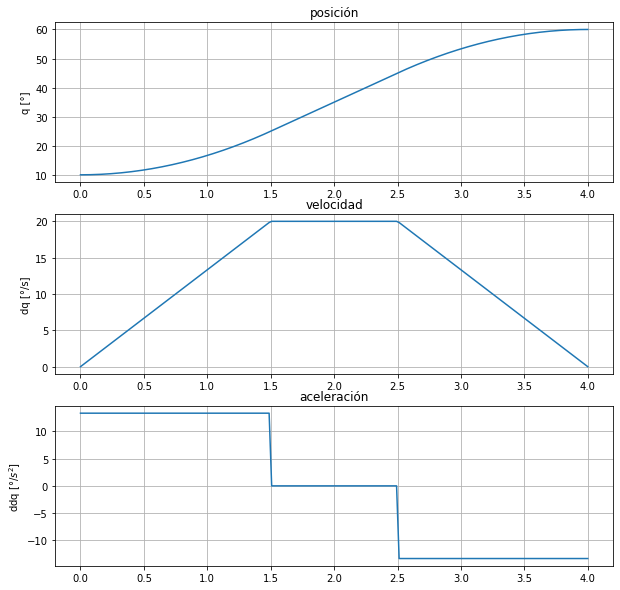

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1); plt.plot(t,q); plt.grid(); plt.title('posición'); plt.ylabel("q [°]")
plt.subplot(3,1,2); plt.plot(t,dq); plt.grid(); plt.title('velocidad'); plt.ylabel("dq [°/s]")
plt.subplot(3,1,3); plt.plot(t,ddq); plt.grid(); plt.title('aceleración'); plt.ylabel("ddq [°/$s^2$]");

### 4. Trayectoria de tiempo mínimo (slide 29)

In [8]:
q0 = 10; qf = 60; ddqmax = 13.33;

tf = 2*np.sqrt((qf-q0)/ddqmax)
tb = tf/2;
dqmax = ddqmax*tb

t = np.linspace(0,4,200)
q, dq, ddq = vel_trapezoidal(q0, qf, dqmax, tf, tb, t)

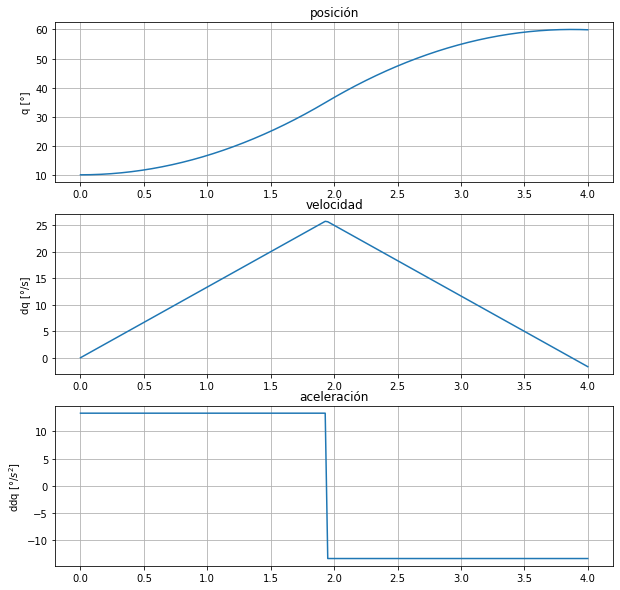

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1); plt.plot(t,q); plt.grid(); plt.title('posición'); plt.ylabel("q [°]")
plt.subplot(3,1,2); plt.plot(t,dq); plt.grid(); plt.title('velocidad'); plt.ylabel("dq [°/s]")
plt.subplot(3,1,3); plt.plot(t,ddq); plt.grid(); plt.title('aceleración'); plt.ylabel("ddq [°/$s^2$]");

### 5. Polinomios con especificaciones de velocidad (slide 36)

Se considerará que los polinomios cúbicos son:
* P1: $q(t) = a_3 t^3 + a_2 t^2 + a_1 t + a_0$, con $t \in [t_1, t_2]$
* P2: $q(t) = b_3 t^3 + b_2 t^2 + b_1 t + b_0$, con $t \in [t_2, t_3]$
* P3: $q(t) = c_3 t^3 + c_2 t^2 + c_1 t + c_0$, con $t \in [t_3, t_4]$

In [10]:
t1 = 0; q1 = 0; dq1 = 0
t2 = 2; q2 = 2*np.pi; dq2 = np.pi
t3 = 3; q3 = np.pi/2; dq3 = -np.pi
t4 = 5; q4 = np.pi; dq4 = 0

# Se formará el sistema Ab = X para encontrar las variables ai, bi, ci contenidas en X
# EL orden de elementos en X es: [a0, a1, a2, a3, b0, b1, b2, b3, c0, c1, c2, c3]

A = np.array([
    [1, t1, t1**2,   t1**3, 0,  0,     0,       0, 0,  0,     0,       0],
    [1, t2, t2**2,   t2**3, 0,  0,     0,       0, 0,  0,     0,       0],
    [0,  1,  2*t1, 3*t1**2, 0,  0,     0,       0, 0,  0,     0,       0],
    [0,  1,  2*t2, 3*t2**2, 0,  0,     0,       0, 0,  0,     0,       0], 
    [0,  0,     0,       0, 1, t2, t2**2,   t2**3, 0,  0,     0,       0],
    [0,  0,     0,       0, 1, t3, t3**2,   t3**3, 0,  0,     0,       0],
    [0,  0,     0,       0, 0,  1,  2*t2, 3*t2**2, 0,  0,     0,       0],
    [0,  0,     0,       0, 0,  1,  2*t3, 3*t3**2, 0,  0,     0,       0],
    [0,  0,     0,       0, 0,  0,     0,       0, 1, t3, t3**2,   t3**3],
    [0,  0,     0,       0, 0,  0,     0,       0, 1, t4, t4**2,   t4**3],
    [0,  0,     0,       0, 0,  0,     0,       0, 0,  1,  2*t3, 3*t3**2],
    [0,  0,     0,       0, 0,  0,     0,       0, 0,  1,  2*t4, 3*t4**2]
])

b = np.array([[q1, q2, dq1, dq2, q2, q3, dq2, dq3, q3, q4, dq3, dq4]]).T

X = np.dot(np.linalg.inv(A), b)
print(X.T)

# Polinomio 1
a0 = X[0]; a1 = X[1]; a2 = X[2]; a3 = X[3]
# Polinomio 2
b0 = X[4]; b1 = X[5]; b2 = X[6]; b3 = X[7]
# Polinomio 3
c0 = X[8]; c1 = X[9]; c2 = X[10]; c3 = X[11]

[[   0.            0.            3.14159265   -0.78539816 -144.51326207
   185.35396656  -73.82742736    9.42477796   81.68140899  -60.86835766
    14.9225651    -1.17809725]]


In [11]:
# Recuperación de los polinomios (por partes)

# Polinomio 1
ta = np.linspace(t1, t2, 50)
qa = a3*ta**3 + a2*ta**2 + a1*ta + a0
dqa = 3*a3*ta**2 + 2*a2*ta + a1
ddqa = 6*a3*ta + 2*a2

# Polinomio 2
tb = np.linspace(t2, t3, 50)
qb = b3*tb**3 + b2*tb**2 + b1*tb + b0
dqb = 3*b3*tb**2 + 2*b2*tb + b1
ddqb = 6*b3*tb + 2*b2

# Polinomio 3
tc = np.linspace(t3, t4, 50)
qc = c3*tc**3 + c2*tc**2 + c1*tc + c0
dqc = 3*c3*tc**2 + 2*c2*tc + c1
ddqc = 6*c3*tc + 2*c2

# Vectores que contienen todo el intervalo de tiempo
t = np.hstack((ta, tb, tc))
q = np.hstack((qa, qb, qc))
dq = np.hstack((dqa, dqb, dqc))
ddq = np.hstack((ddqa, ddqb, ddqc))

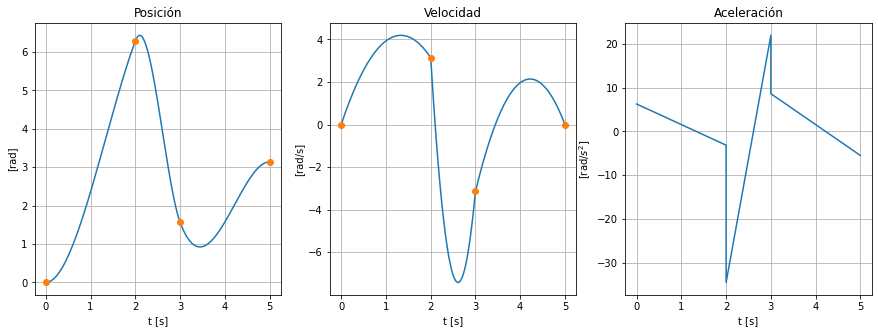

In [12]:
plt.figure(figsize=(15,5))

# Posición
plt.subplot(1,3,1); plt.plot(t, q); 
plt.plot([t1, t2, t3, t4], [q1, q2, q3, q4], 'o')
plt.title("Posición"); plt.xlabel("t [s]"); plt.ylabel("[rad]")
plt.grid()

# Velocidad
plt.subplot(1,3,2); plt.plot(t, dq)
plt.plot([t1, t2, t3, t4], [dq1, dq2, dq3, dq4], 'o')
plt.title("Velocidad"); plt.xlabel("t [s]"); plt.ylabel("[rad/s]")
plt.grid()

plt.subplot(1,3,3); plt.plot(t, ddq)
plt.title("Aceleración"); plt.xlabel("t [s]"); plt.ylabel("[rad/$s^2$]")
plt.grid()

### 6. Interpolación con splines cúbicos (slide 39)

Se considerará que los polinomios cúbicos son:
* P1: $q(t) = a_3 t^3 + a_2 t^2 + a_1 t + a_0$, con $t \in [t_1, t_2]$
* P2: $q(t) = b_3 t^3 + b_2 t^2 + b_1 t + b_0$, con $t \in [t_2, t_3]$
* P3: $q(t) = c_3 t^3 + c_2 t^2 + c_1 t + c_0$, con $t \in [t_3, t_4]$

In [13]:
t1 = 0; q1 = 0; dq1 = 0
t2 = 2; q2 = 2*np.pi
t3 = 3; q3 = np.pi/2
t4 = 5; q4 = np.pi; dq4 = 0

# Se formará el sistema Ab = X para encontrar las variables ai, bi, ci contenidas en X
# EL orden de elementos en X es: [a0, a1, a2, a3, b0, b1, b2, b3, c0, c1, c2, c3]

A = np.array([
    [1, t1, t1**2,   t1**3, 0,  0,     0,        0, 0,  0,     0,        0],
    [1, t2, t2**2,   t2**3, 0,  0,     0,        0, 0,  0,     0,        0],
    [0,  0,     0,       0, 1, t2, t2**2,    t2**3, 0,  0,     0,        0],
    [0,  0,     0,       0, 1, t3, t3**2,    t3**3, 0,  0,     0,        0],
    [0,  0,     0,       0, 0,  0,     0,        0, 1, t3, t3**2,    t3**3],
    [0,  0,     0,       0, 0,  0,     0,        0, 1, t4, t4**2,    t4**3],
    [0,  1,  2*t1, 3*t1**2, 0,  0,     0,        0, 0,  0,     0,        0],
    [0,  0,     0,       0, 0,  0,     0,        0, 0,  1,  2*t4,  3*t4**2],
    [0,  1,  2*t2, 3*t2**2, 0, -1, -2*t2, -3*t2**2, 0,  0,     0,        0],
    [0,  0,     0,       0, 0,  1,  2*t3,  3*t3**2, 0, -1, -2*t3, -3*t3**2],
    [0,  0,     2,    6*t2, 0,  0,    -2,    -6*t2, 0,  0,     0,        0],
    [0,  0,     0,       0, 0,  0,     2,     6*t3, 0,  0,    -2,    -6*t3]
])

b = np.array([[q1, q2, q2, q3, q3, q4, dq1, dq4, 0, 0, 0, 0]]).T

X = np.dot(np.linalg.inv(A), b)
print(X.T)

# Polinomio 1
a0 = X[0]; a1 = X[1]; a2 = X[2]; a3 = X[3]
# Polinomio 2
b0 = X[4]; b1 = X[5]; b2 = X[6]; b3 = X[7]
# Polinomio 3
c0 = X[8]; c1 = X[9]; c2 = X[10]; c3 = X[11]

[[  0.           0.           5.66959299  -2.04939833 -47.02571503
   70.53857255 -29.59969328   3.82881605  91.80568219 -68.29282468
   16.67743913  -1.31308755]]


In [14]:
# Recuperación de los polinomios (por partes)

# Polinomio 1
ta = np.linspace(t1, t2, 50)
qa = a3*ta**3 + a2*ta**2 + a1*ta + a0
dqa = 3*a3*ta**2 + 2*a2*ta + a1
ddqa = 6*a3*ta + 2*a2

# Polinomio 2
tb = np.linspace(t2, t3, 50)
qb = b3*tb**3 + b2*tb**2 + b1*tb + b0
dqb = 3*b3*tb**2 + 2*b2*tb + b1
ddqb = 6*b3*tb + 2*b2

# Polinomio 3
tc = np.linspace(t3, t4, 50)
qc = c3*tc**3 + c2*tc**2 + c1*tc + c0
dqc = 3*c3*tc**2 + 2*c2*tc + c1
ddqc = 6*c3*tc + 2*c2

# Vectores que contienen todo el intervalo de tiempo
t = np.hstack((ta, tb, tc))
q = np.hstack((qa, qb, qc))
dq = np.hstack((dqa, dqb, dqc))
ddq = np.hstack((ddqa, ddqb, ddqc))

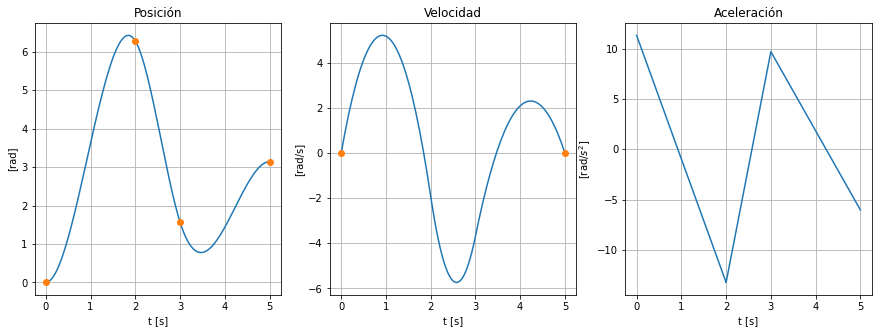

In [15]:
plt.figure(figsize=(15,5))

# Posición
plt.subplot(1,3,1); plt.plot(t, q); 
plt.plot([t1, t2, t3, t4], [q1, q2, q3, q4], 'o')
plt.title("Posición"); plt.xlabel("t [s]"); plt.ylabel("[rad]")
plt.grid()

# Velocidad
plt.subplot(1,3,2); plt.plot(t, dq)
plt.plot([t1, t4], [dq1, dq4], 'o')
plt.title("Velocidad"); plt.xlabel("t [s]"); plt.ylabel("[rad/s]")
plt.grid()

plt.subplot(1,3,3); plt.plot(t, ddq)
plt.title("Aceleración"); plt.xlabel("t [s]"); plt.ylabel("[rad/$s^2$]")
plt.grid()